In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px

In [2]:
iris = sns.load_dataset('iris')

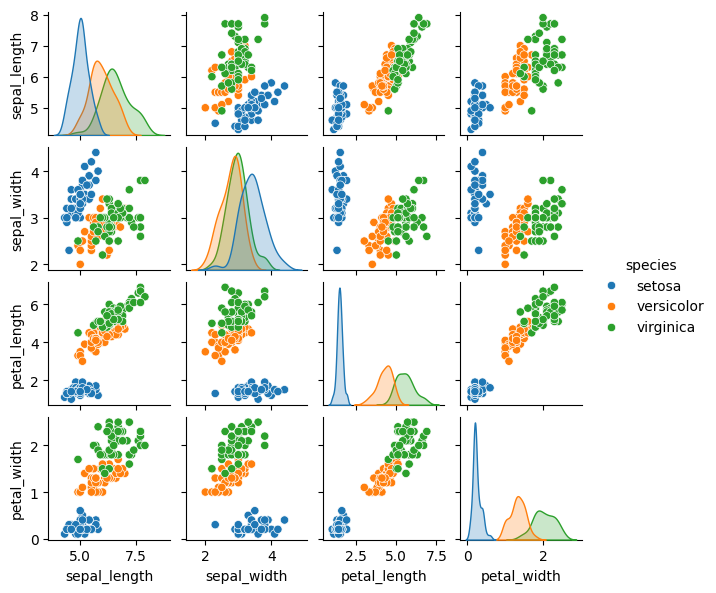

In [3]:
sns.pairplot(iris, hue='species', height=1.5);


In [4]:
X_iris = iris.drop(columns="species")
y_iris = iris['species']


In [5]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

In [6]:
from sklearn.naive_bayes import GaussianNB 
model = GaussianNB() 
model.fit(Xtrain, ytrain) 
y_model = model.predict(Xtest) 

In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

In [8]:
from sklearn.decomposition import PCA
model = PCA(n_components=2) 
model.fit(X_iris) 
X_2D = model.transform(X_iris) 

In [9]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]

In [10]:
px.scatter(iris, "PCA1", "PCA2", color="species", width=700, height=600)

In [11]:
from sklearn.mixture import GaussianMixture 
model = GaussianMixture(n_components=3, covariance_type='full') 
model.fit(X_iris) 
y_gmm = model.predict(X_iris) 

In [12]:
iris['cluster'] = y_gmm
px.scatter(iris, "PCA1", "PCA2", facet_col="cluster", color="species")

Application: Exploring Handwritten Digits

In [13]:
from sklearn.datasets import load_digits
digits = load_digits()

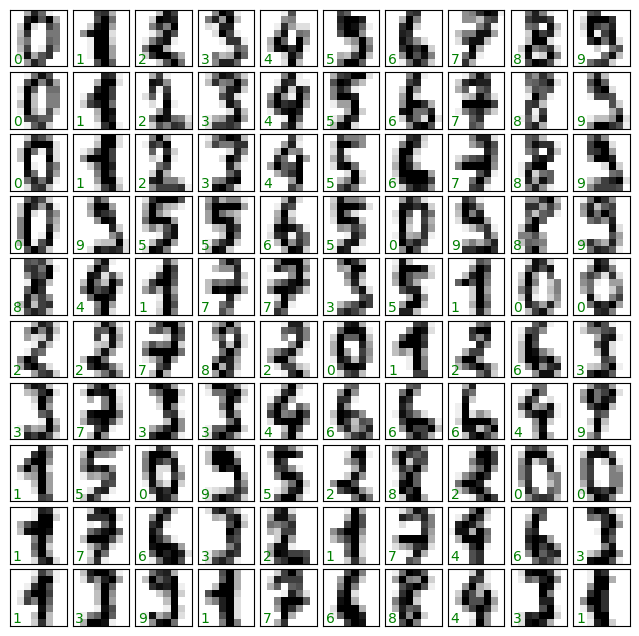

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [15]:
X = digits.data
y = digits.target

In [17]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)

c:\Users\ankur\Downloads\programming\ankurmal.github.io\.venv\Lib\site-packages\sklearn\manifold\_isomap.py:360: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

c:\Users\ankur\Downloads\programming\ankurmal.github.io\.venv\Lib\site-packages\scipy\sparse\_index.py:174: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.



In [30]:
import plotly.express as px

px.scatter(x=data_projected[:,0], y=data_projected[:,1], color=y, labels={
    "color":"digit label" 
})

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

In [27]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_model)

px.imshow(
    mat,
    text_auto=True,
    color_continuous_scale="Blues",
    labels=dict(x="predicted value", y="true value", color="Count"),
)

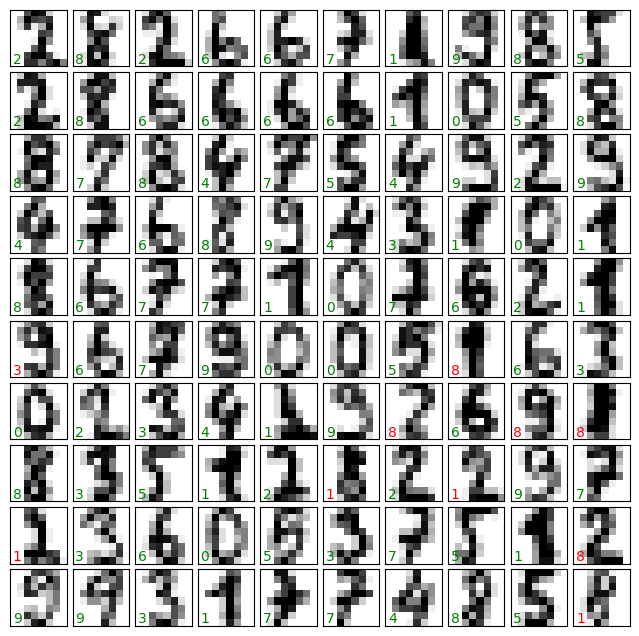

In [ ]:

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')